# Amazon Top 50 Bestselling Books 2009 - 2019 

In [1]:
#import all important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#read tha data from csv file
df = pd.read_csv('Amazone books best sellers.csv')

In [4]:
#take a look at the data
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [5]:
df.rename(columns={'User Rating':"UserRating"},inplace=True)

In [6]:
#No null values in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        550 non-null    object 
 1   Author      550 non-null    object 
 2   UserRating  550 non-null    float64
 3   Reviews     550 non-null    int64  
 4   Price       550 non-null    int64  
 5   Year        550 non-null    int64  
 6   Genre       550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
df.describe()

,UserRating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
df['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [9]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

## Some data preparation

In [11]:
# Look at top 20 authors by number of reviews
dfByAuthor = df.groupby(['Author','Genre'],as_index=False)[['Reviews','UserRating','Price']].mean()
dfByAuthor.sort_values('Reviews',ascending=False).head(20)

,Author,Genre,Reviews,UserRating,Price
69,Delia Owens,Fiction,87841.000000,4.800000,15.000000
181,Paula Hawkins,Fiction,79446.000000,4.100000,12.500000
169,Michelle Obama,Non Fiction,61133.000000,4.800000,11.000000
101,Gillian Flynn,Fiction,57271.000000,4.000000,9.666667
143,Kristin Hannah,Fiction,49288.000000,4.800000,11.000000
129,John Green,Fiction,42083.800000,4.660000,10.600000
15,Andy Weir,Fiction,39459.000000,4.700000,9.000000
21,Anthony Doerr,Fiction,36348.000000,4.600000,14.000000
183,Paulo Coelho,Fiction,35799.000000,4.700000,39.000000
72,Donna Tartt,Fiction,33844.000000,3.900000,20.000000


Text(12.085, 0.5, '')

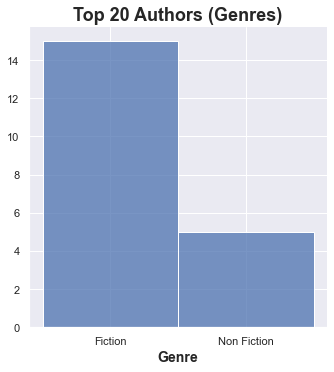

In [90]:
sns.set_theme()
sns.displot(dfByAuthor.sort_values('Reviews',ascending=False).head(20)['Genre'])
plt.title('Top 20 Authors (Genres)',fontdict={'weight':'bold','size': 18})
plt.xlabel('Genre',fontdict={'weight':'bold','size': 14})
plt.ylabel('')

## Scatterplot on authors/review

(22001.0, 97841.0)

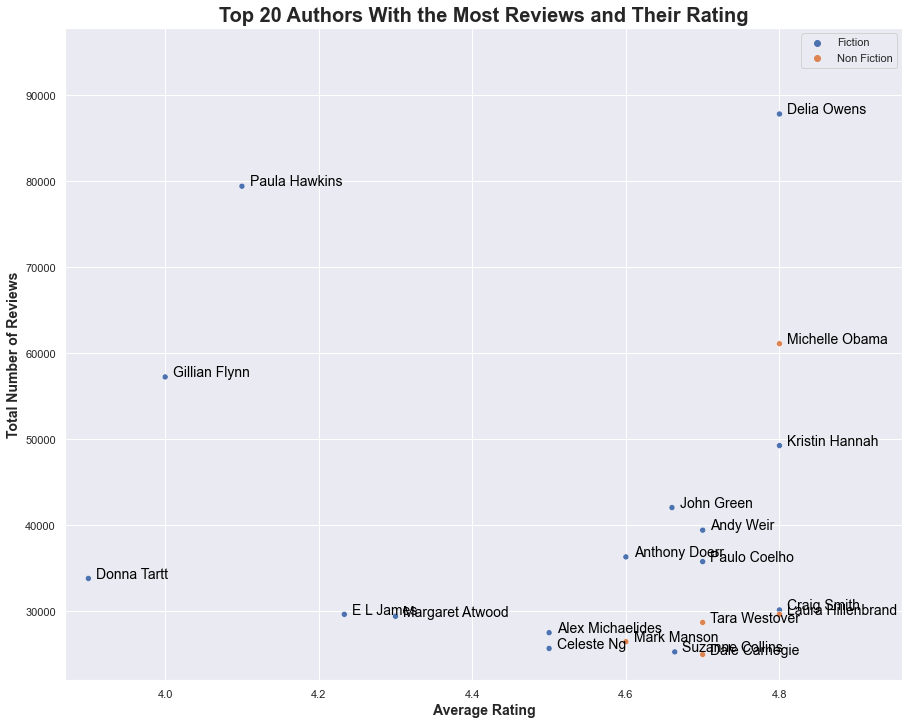

In [25]:
#Building a scatterplot using seaborn
df_scatter = dfByAuthor.sort_values('Reviews',ascending=False).head(20)
df_scatter.reset_index(inplace=True)
plt.figure(figsize=(15,12))

sns.set_theme()
sns.scatterplot(data=df_scatter,x='UserRating',y='Reviews',hue='Genre',sizes=12)

plt.title('Top 20 Authors With the Most Reviews and Their Rating', fontdict={'weight':'bold','size': 20})
plt.xlabel('Average Rating', fontdict={'weight':'bold','size': 14})
plt.ylabel('Total Number of Reviews', fontdict={'weight':'bold','size': 14})
plt.legend(loc='best')

for i in range(df_scatter.shape[0]):
    plt.text(x=df_scatter.UserRating[i]+0.01,y=df_scatter.Reviews[i]+1,s=df_scatter.Author[i],
             fontdict=dict(color='black',size=14))
    
plt.xlim(df_scatter.UserRating.min()-0.03,df_scatter.UserRating.max()+0.16)
plt.ylim(df_scatter.Reviews.min()-3000,df_scatter.Reviews.max()+10000)

## Overview of top-rated books

In [49]:
#prepare data
dfByBook = df.groupby(['Name','Genre'],as_index=False)[['Reviews','UserRating','Price']].mean()
TopRatedBooks = dfByBook[dfByBook['UserRating']==4.9]
TopRatedBooks

,Name,Genre,Reviews,UserRating,Price
36,"Brown Bear, Brown Bear, What Do You See?",Fiction,14344.0,4.9,5.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Fiction,5062.0,4.9,6.0
67,Dog Man: A Tale of Two Kitties: From the Creat...,Fiction,4786.0,4.9,8.0
68,Dog Man: Brawl of the Wild: From the Creator o...,Fiction,7235.0,4.9,4.0
69,Dog Man: Fetch-22: From the Creator of Captain...,Fiction,12619.0,4.9,8.0
70,Dog Man: For Whom the Ball Rolls: From the Cre...,Fiction,9089.0,4.9,8.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Fiction,5470.0,4.9,6.0
108,"Goodnight, Goodnight Construction Site (Hardco...",Fiction,7038.0,4.9,7.0
112,Hamilton: The Revolution,Non Fiction,5867.0,4.9,54.0
116,Harry Potter and the Chamber of Secrets: The I...,Fiction,19622.0,4.9,30.0


Text(0.0, 1.0, 'Books with the Highest User Rating and their Reviews')

C:\Users\lukia\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lukia\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


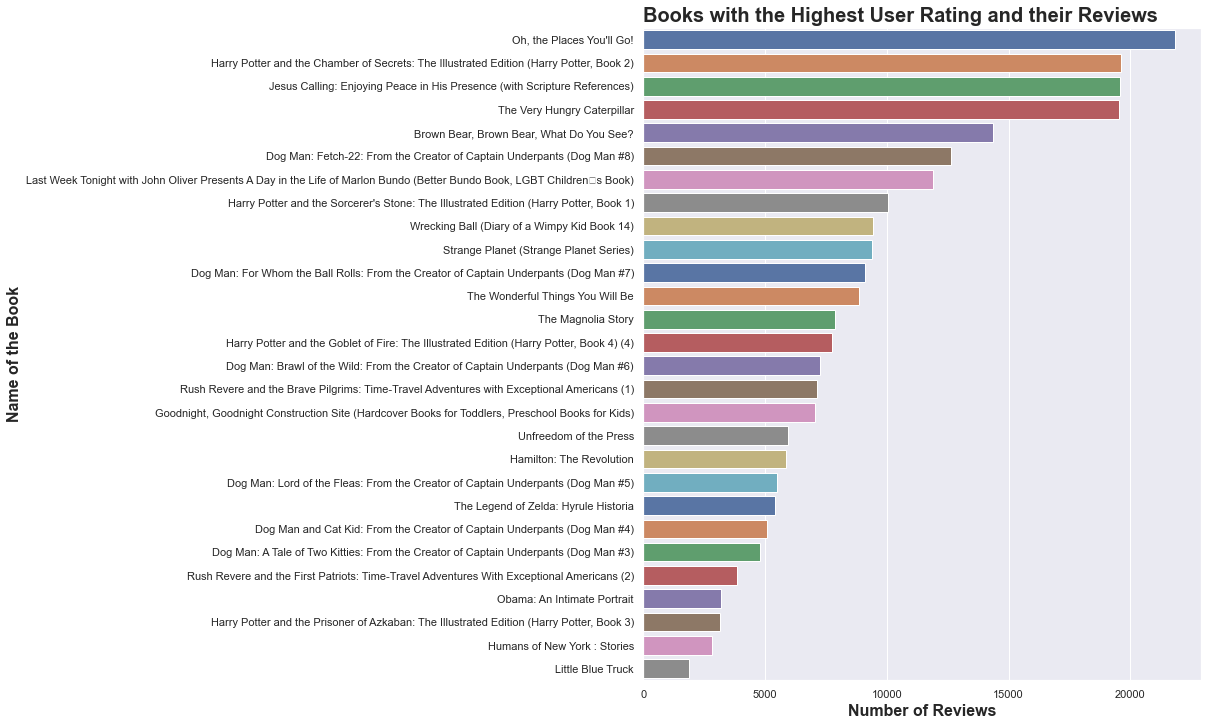

In [92]:
#building a barplot
plt.figure(figsize=(10,12))
sns.barplot(data=TopRatedBooks.sort_values('Reviews',ascending=False),y='Name',x='Reviews',palette='deep')

plt.xlabel('Number of Reviews',fontdict={'weight':'bold','size': 16})
plt.ylabel('Name of the Book',fontdict={'weight':'bold','size': 16})
plt.title('Books with the Highest User Rating and their Reviews',fontdict={'weight':'bold','size': 20},loc='left')

## What genre is more popular? - Piechart

In [74]:
booksByName = df.groupby(['Name','Genre'],
                         as_index=False)['Price','UserRating','Reviews'].mean()
booksByName['FirstYear'] = df.groupby(['Name','Genre'],as_index=False)['Year'].min()['Year']
booksByName.head()

C:\Users\lukia\AppData\Local\Temp/ipykernel_10420/1770318100.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  booksByName = df.groupby(['Name','Genre'],


,Name,Genre,Price,UserRating,Reviews,FirstYear
0,10-Day Green Smoothie Cleanse,Non Fiction,8.0,4.7,17350.0,2016
1,11/22/63: A Novel,Fiction,22.0,4.6,2052.0,2011
2,12 Rules for Life: An Antidote to Chaos,Non Fiction,15.0,4.7,18979.0,2018
3,1984 (Signet Classics),Fiction,6.0,4.7,21424.0,2017
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction,12.0,4.8,7665.0,2019


In [75]:
booksByName['Genre'].value_counts()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Genre of all bestselling books 2009-2019')

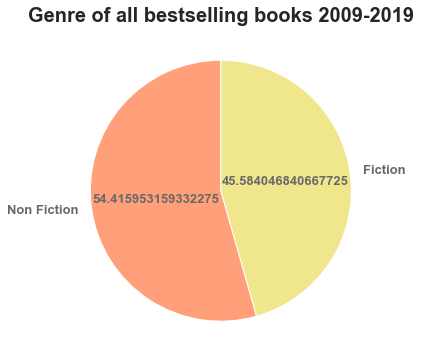

In [52]:
plt.figure(figsize=(8,6))
plt.pie(x=booksByName['Genre'].value_counts(),labels=booksByName['Genre'].value_counts().index,
        autopct=str,startangle=90,textprops={'size': 13,'color':'dimgrey','weight':'bold'},colors=['lightsalmon','khaki'],
       pctdistance=0.5)
plt.title('Genre of all bestselling books 2009-2019',fontdict={'weight':'bold','size': 20})

## How does price and rating change over the years? - Line chart

In [20]:
dfGroupedYear = df.groupby(['Year'],as_index=False)['Price','UserRating'].mean()
dfGroupedYear                                           

C:\Users\lukia\AppData\Local\Temp/ipykernel_10420/2955714828.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfGroupedYear = df.groupby(['Year'],as_index=False)['Price','UserRating'].mean()


,Year,Price,UserRating
0,2009,15.40,4.584
1,2010,13.48,4.558
2,2011,15.10,4.558
3,2012,15.30,4.532
4,2013,14.60,4.554
5,2014,14.64,4.622
6,2015,10.42,4.648
7,2016,13.18,4.678
8,2017,11.38,4.660
9,2018,10.52,4.668


Text(0.5, 1.0, 'Price and rating over Years')

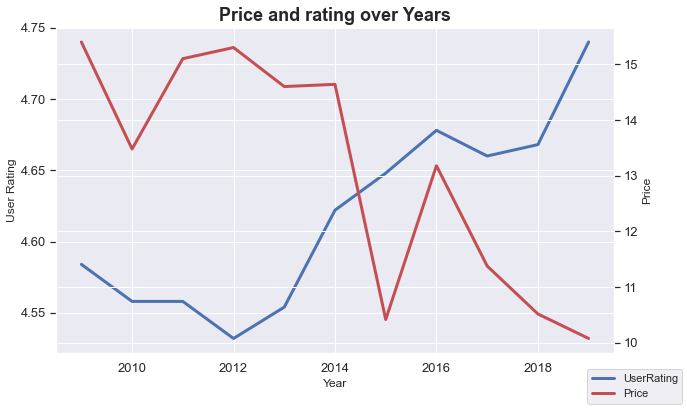

In [21]:
ax = dfGroupedYear.plot(x="Year", y="UserRating", legend=False,figsize=(10,6),
                        linewidth=3,xlabel='Year',ylabel='User Rating',fontsize=13)
ax2 = ax.twinx()
dfGroupedYear.plot(x="Year", y="Price", ax=ax2, legend=False, color="r",linewidth=3,
                   ylabel='Price',fontsize=13)
ax.figure.legend(loc='lower right')
plt.title('Price and rating over Years', fontdict={'weight':'bold','size': 18})

## Correlation of Year, Price, User Rating, Number of Reviews and Genre

In [76]:
#Make Genre (Fiction and Non Fiction) from categorical to numerical (0,1)
booksByName['dummyNonFiction'] = pd.get_dummies(data=booksByName.Genre,drop_first=True)

In [77]:
booksByName.head()

,Name,Genre,Price,UserRating,Reviews,FirstYear,dummyNonFiction
0,10-Day Green Smoothie Cleanse,Non Fiction,8.0,4.7,17350.0,2016,1
1,11/22/63: A Novel,Fiction,22.0,4.6,2052.0,2011,0
2,12 Rules for Life: An Antidote to Chaos,Non Fiction,15.0,4.7,18979.0,2018,1
3,1984 (Signet Classics),Fiction,6.0,4.7,21424.0,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction,12.0,4.8,7665.0,2019,1


In [78]:
#Now we can look on some correlation between numerical values
booksByName.corr()

,Price,UserRating,Reviews,FirstYear,dummyNonFiction
Price,1.000000,-0.030686,-0.033600,-0.131562,0.082338
UserRating,-0.030686,1.000000,-0.055691,0.221138,-0.026974
Reviews,-0.033600,-0.055691,1.000000,0.225135,-0.279637
FirstYear,-0.131562,0.221138,0.225135,1.000000,0.062995
dummyNonFiction,0.082338,-0.026974,-0.279637,0.062995,1.000000


Text(0.5, 1.0, 'Correlation matrix')

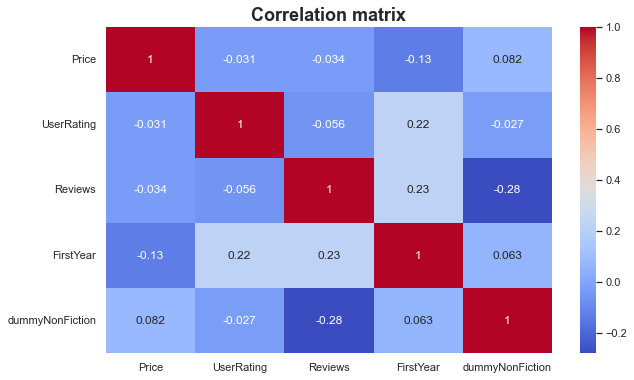

In [83]:
# Seems like there is almost no correlation between values, have a better look at heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data=booksByName.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation matrix',fontdict={'weight':'bold','size': 18})

In [ ]:
#We have at least some correlation NonFiction-Reviews (more people read and make reviews to fiction)
#Suprisengly for me, price has almost zero correlation to the genre